# Mid-Course Project

Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes (inside the .ipynb file that I’ve attached). Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!\
KP

## 0. Read in the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
# rotten tomatoes movie data set from Maven's data playground

movies = pd.read_csv('Data/Rotten Tomatoes Movies.csv')
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [6]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


## 1. Explore the Data

How many movies are in this data set?

In [7]:
# number of rows and columns
movies.shape

(16638, 9)

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [8]:
# check the data tupes

movies.dtypes

movie_title            object
rating                 object
genre                  object
in_theaters_date       object
runtime_in_minutes    float64
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
audience_count        float64
dtype: object

In [10]:
# convert the in_threatres_date to a datetime filed
movies["in_theaters_date"] = pd.to_datetime(movies["in_theaters_date"])

In [11]:
movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0


In [15]:
# filter on only movies from the 2010's and newer

movies = movies[movies["in_theaters_date"].dt.year >= 2010]
movies.head(3)

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0


In [16]:
# find the number of movies

movies.shape

(6053, 9)

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [18]:
# highest rated movies by critics

movies.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",PG-13,"Action & Adventure, Animation",2012-01-01,134.0,100,5,93.0,8482.0
8500,King Georges,NR,Documentary,2016-02-26,78.0,100,9,54.0,240.0
8495,King Charles III,NR,Drama,2017-05-14,88.0,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),NR,"Art House & International, Documentary",2017-12-15,124.0,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),NR,"Action & Adventure, Art House & International,...",2016-05-13,120.0,100,22,63.0,544.0


In [22]:
# highest rated movies by the audience

movies.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0
9051,Little Monsters,R,"Comedy, Horror",2019-10-08,94.0,83,94,100.0,9.0
7137,Haunt,R,"Horror, Mystery & Suspense",2019-09-13,92.0,68,38,100.0,7.0
16438,Wonders of the Sea,NR,Documentary,2019-01-17,82.0,76,17,100.0,13.0
14580,The Most Dangerous Year,NR,Documentary,2019-04-12,90.0,91,11,100.0,40.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [25]:
movies_popular = movies[movies["audience_count"] > 100000]
movies_popular.shape

(316, 9)

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [26]:
# highest rated popular movies according to tomatometer_rating

movies_popular.sort_values('tomatometer_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,PG,"Animation, Kids & Family, Science Fiction & Fa...",2010-03-26,98.0,99,208,91.0,312342.0
15416,Toy Story 3,G,"Animation, Comedy, Kids & Family",2010-06-18,103.0,98,305,89.0,606931.0
7925,Inside Out,PG,"Animation, Kids & Family",2015-06-19,94.0,98,357,89.0,136125.0
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
9355,Mad Max: Fury Road,R,"Action & Adventure, Science Fiction & Fantasy",2015-05-15,120.0,97,410,85.0,127428.0


In [27]:
# highest rated popular movies according to audience rating

movies_popular.sort_values('audience_rating', ascending=False).head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,PG,"Action & Adventure, Animation, Comedy",2016-03-04,108.0,97,279,92.0,100946.0
6950,Guardians of the Galaxy,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-08-01,121.0,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,PG-13,"Action & Adventure, Science Fiction & Fantasy",2014-04-04,136.0,90,292,92.0,281524.0
14397,The King's Speech,PG-13,Drama,2010-11-26,118.0,95,292,92.0,144306.0
14549,The Martian,PG-13,Science Fiction & Fantasy,2015-10-02,164.0,91,361,91.0,131093.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [28]:
# number of movies that fall under each type of rating

movies_popular["rating"].value_counts()

PG-13    160
R        100
PG        51
G          5
Name: rating, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [31]:
# PG-13 movies are most highly rated

movies_popular.groupby('rating')['audience_rating'].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

## 2. Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [42]:
# returns a warning since we are trying to set a value on a copy of
# a slice from a dataframe

# movies_popular["Animation"] = np.where(movies_popular["genre"].str.contains('Animation'), 1, 0)

In [43]:
# copy the popular movies to avoid a warning

movies_popular = movies[movies["audience_count"] > 100000].copy()

In [47]:
# creating column for action and adventure

movies_popular["Animation"] = np.where(movies_popular["genre"].str.contains('Animation'), 1, 0)

In [44]:
# creating column for action and adventure

movies_popular["Action & Adventure"] = np.where(movies_popular["genre"].str.contains('Action & Adventure'), 1, 0)

In [45]:
# creating column for comedy

movies_popular["Comedy"] = np.where(movies_popular["genre"].str.contains('Comedy'), 1, 0)

In [59]:
movies_popular.set_index('movie_title').iloc[:, -3:]

,Action & Adventure,Comedy,Animation
movie_title,,,
Percy Jackson & the Olympians: The Lightning Thief,1,1,0
Tron Legacy,1,0,0
The Last Song,0,0,0
Repo Men,1,0,0
Predators,1,0,0
...,...,...,...
X-Men: Days of Future Past,1,0,0
X-Men: First Class,1,0,0
Youth in Revolt,0,1,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [63]:
movies_popular.groupby('rating')[['Animation', 'Action & Adventure', 'Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [65]:
# both critics and the general audience love animated movies

movies_popular.groupby('Animation')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [66]:
# the general audience likes action movies more than critics

movies_popular.groupby('Action & Adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [67]:
# comedies have lower ratings than other genres

movies_popular.groupby('Comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


## 3. Visualize the Data

Create a pair plot from the popular movies DataFrame.

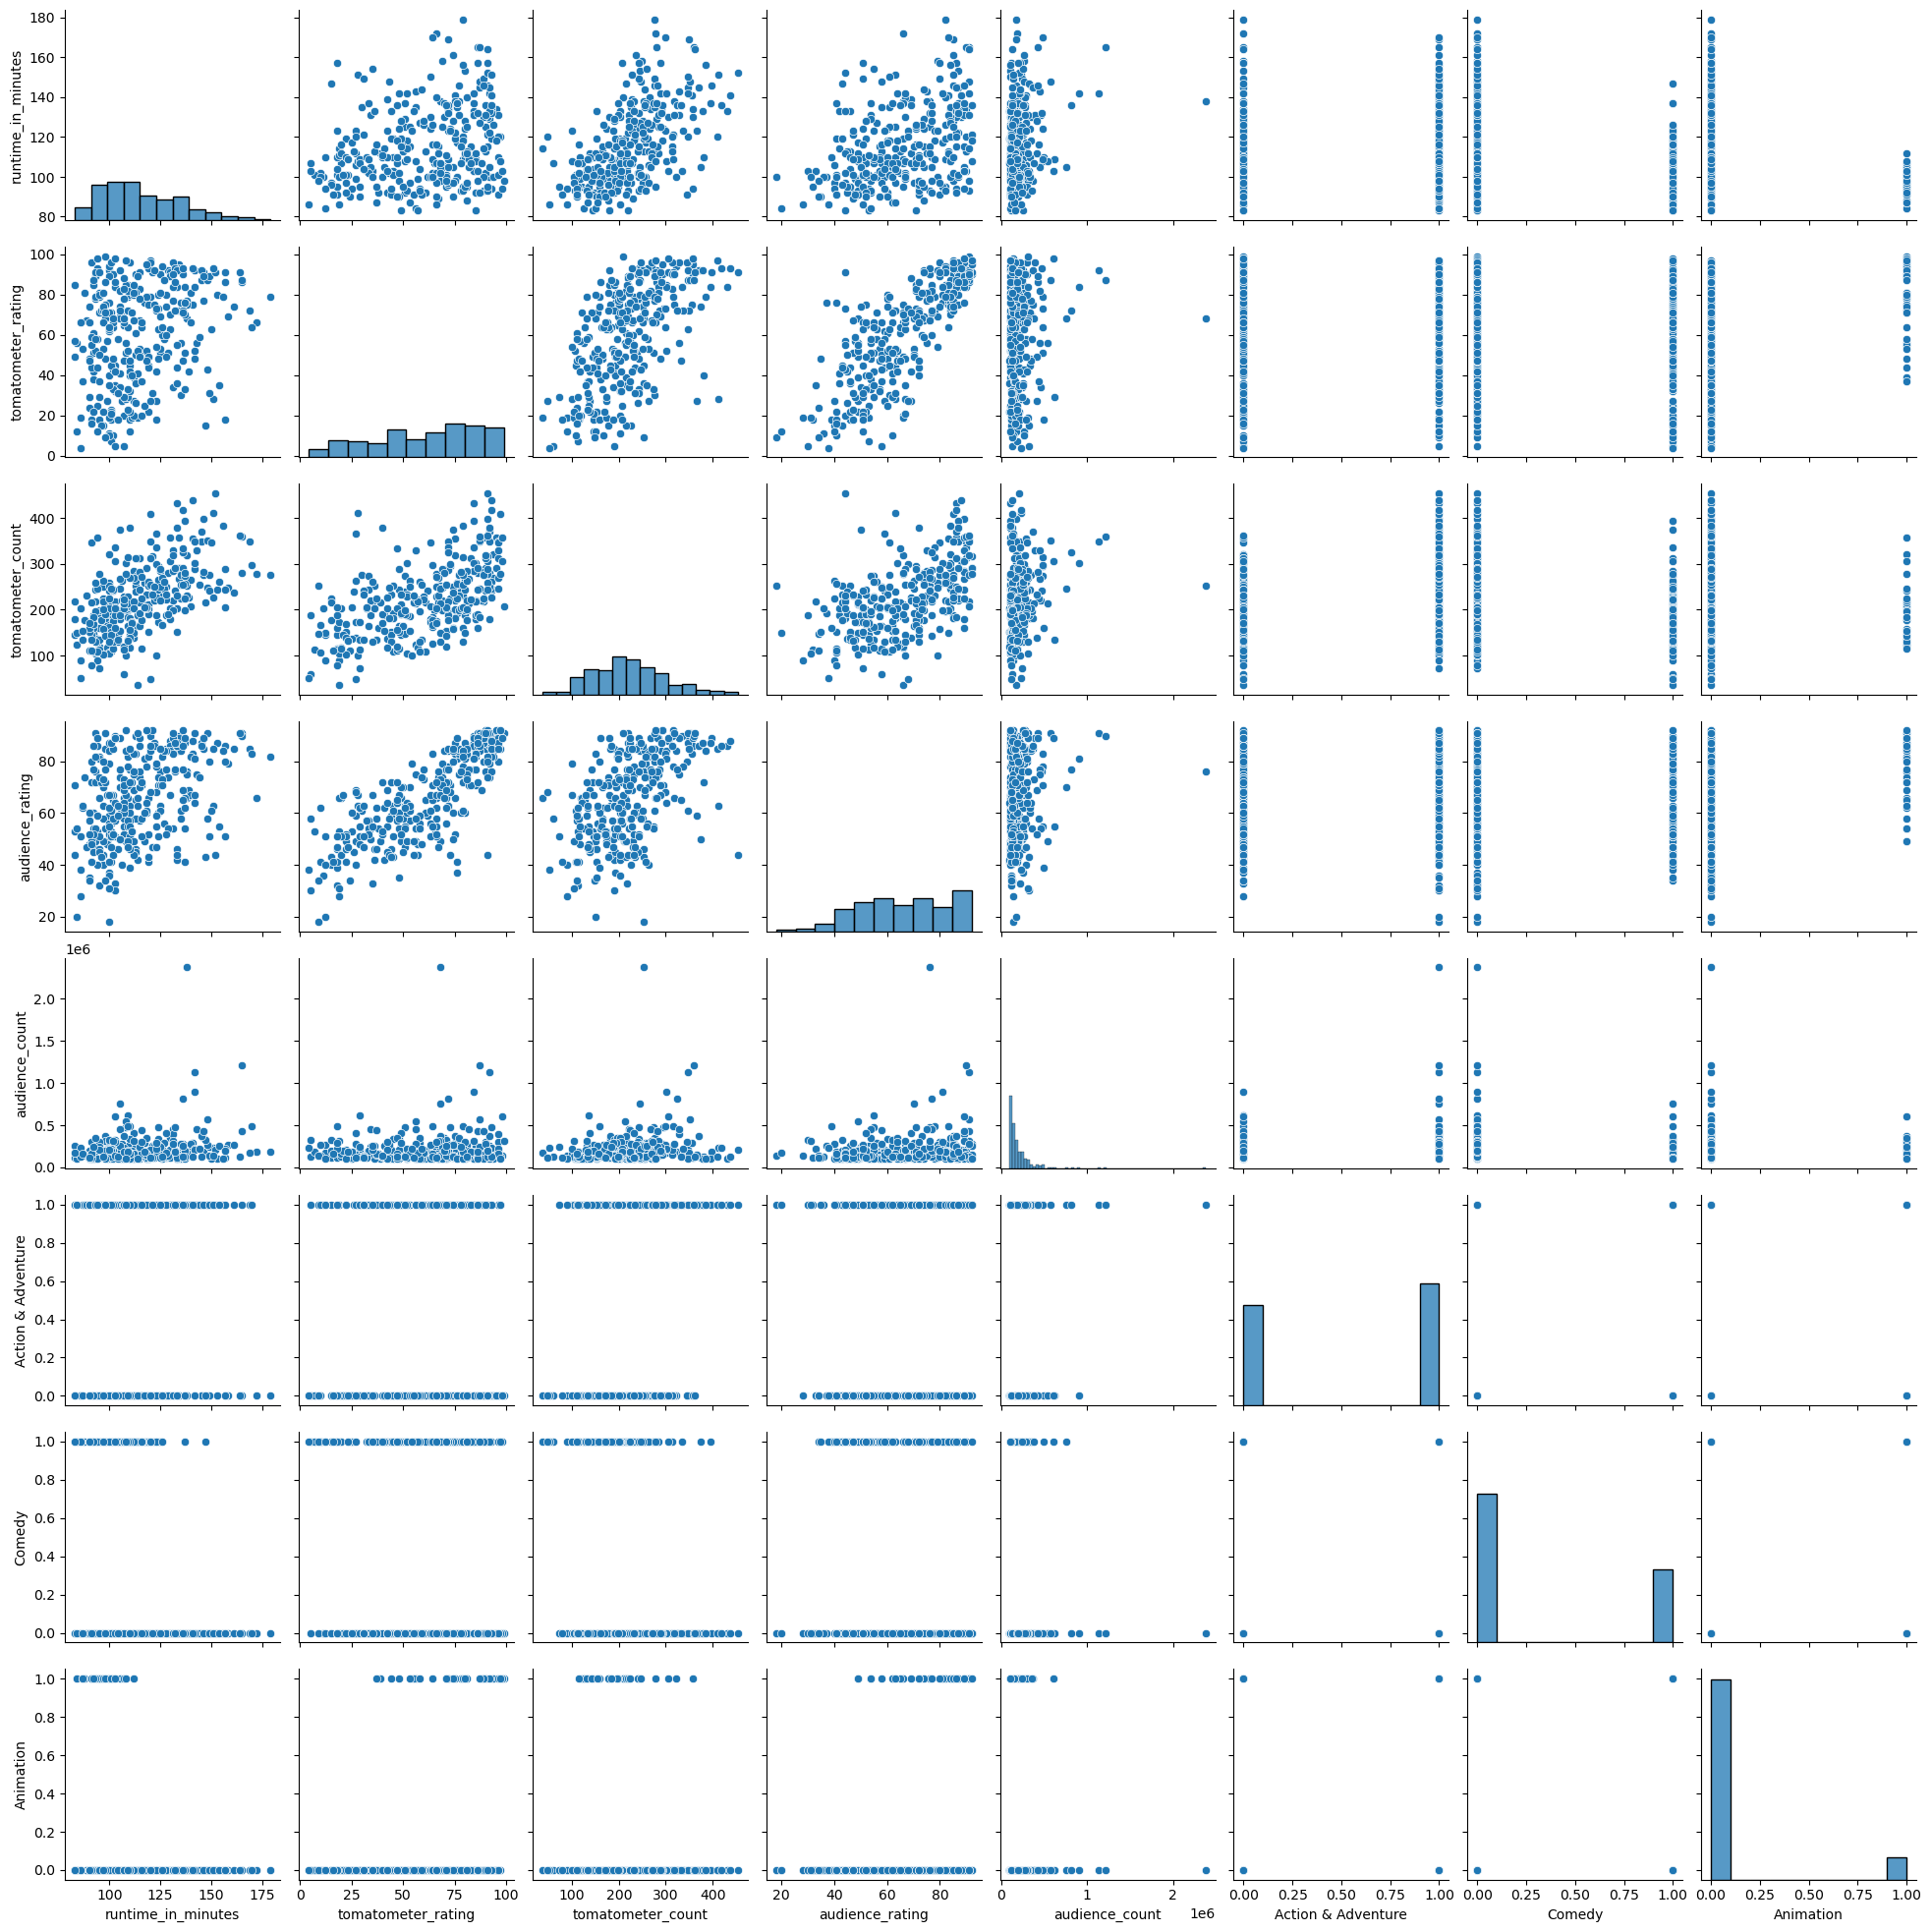

In [69]:
# chart has two many plots

sns.pairplot(movies_popular);

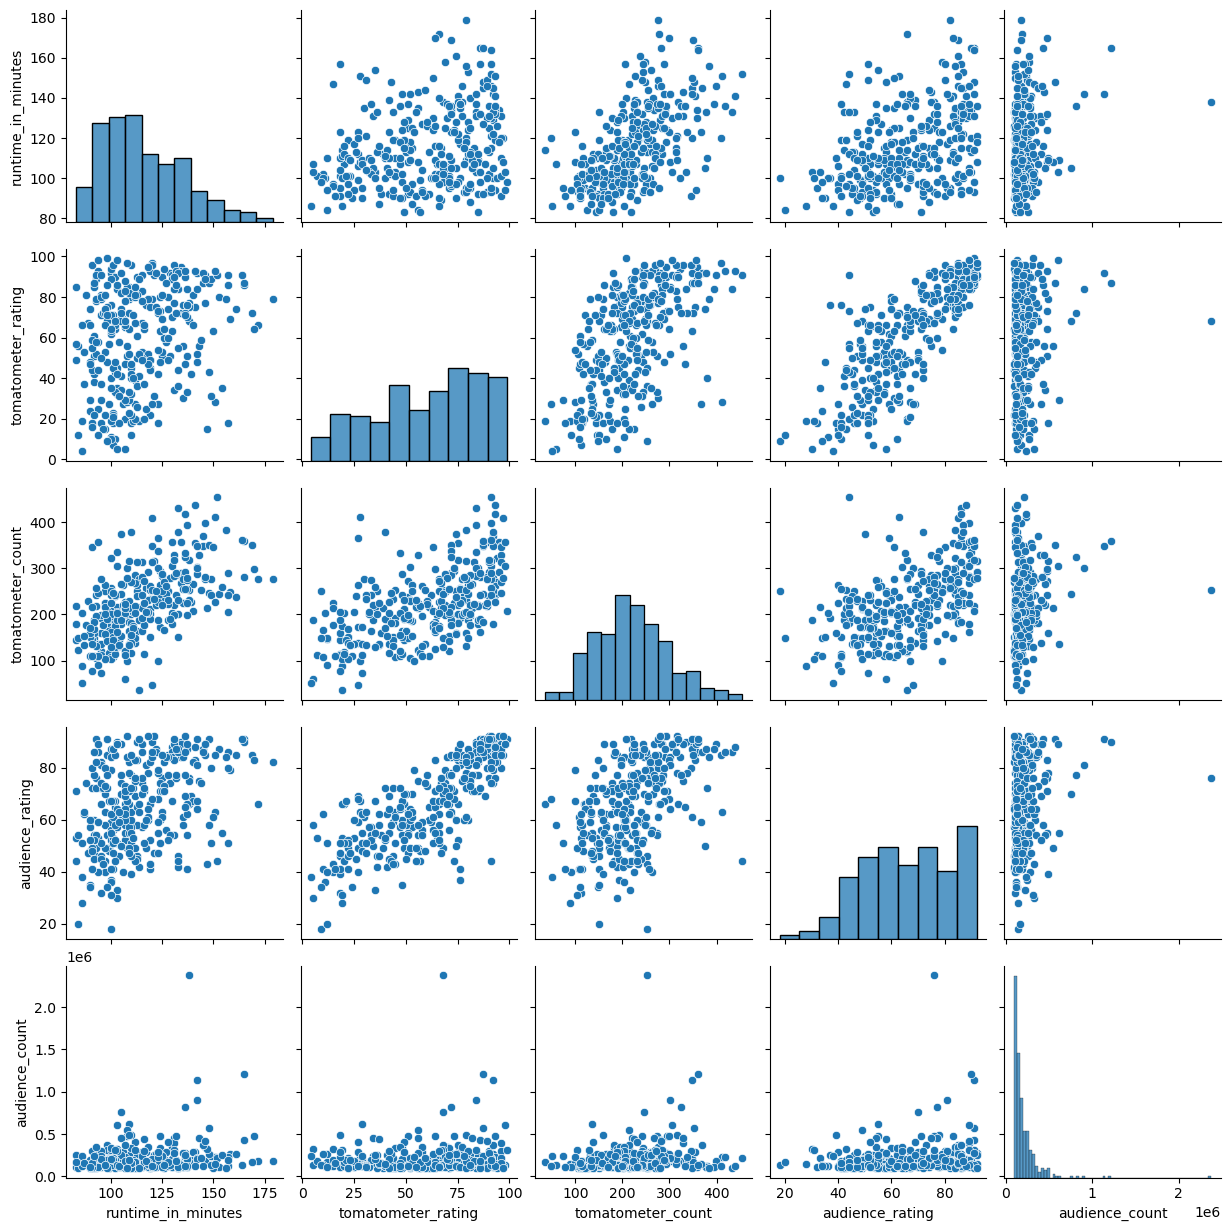

In [71]:
# excluding the newly created columns

sns.pairplot(movies_popular.iloc[:, :-3]);

What insights can you gather from this pair plot?
* How do the critic ratings (tomatometer_rating) compare with the audience ratings (compare the histograms)?
* What are some surprising findings about the run times of movies compared with other fields (look at the scatter plots)?
* What is the most popular movie by far in terms of the number of audience ratings?

In [ ]:
# critics give hasher reviews -- there are quite a few low ratings in the tomatometer histogram
# the run time of movies seems to be correlated with the number of critic ratings
# the most popular movie is Shutter Island with lots of audience ratings and not as many critic ratings --
## this is so extreme that it could potentially be an outlier / error


In [73]:
movies_popular[movies_popular.audience_count > 1000000]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Action & Adventure,Comedy,Animation
1646,Shutter Island,R,"Action & Adventure, Drama, Mystery & Suspense",2010-02-19,138.0,68,253,76.0,2373625.0,1,0,0
9581,Marvel's The Avengers,PG-13,"Action & Adventure, Science Fiction & Fantasy",2012-05-04,142.0,92,348,91.0,1134955.0,1,0,0
13936,The Dark Knight Rises,PG-13,"Action & Adventure, Drama, Mystery & Suspense",2012-07-20,165.0,87,360,90.0,1210957.0,1,0,0
